In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
bookings = pd.read_csv(r"D:\HOSPITALITY-PROJECT-main\HOSPITALITY-PROJECT-main\DATA\fact_bookings.csv")
hotels = pd.read_csv(r"D:\HOSPITALITY-PROJECT-main\HOSPITALITY-PROJECT-main\DATA\dim_hotels.csv")
rooms = pd.read_csv(r"D:\HOSPITALITY-PROJECT-main\HOSPITALITY-PROJECT-main\DATA\dim_rooms.csv")

bookings.head()
bookings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [6]:
bookings['booking_date'] = pd.to_datetime(bookings['booking_date'])
bookings['check_in_date'] = pd.to_datetime(bookings['check_in_date'])
bookings['checkout_date'] = pd.to_datetime(bookings['checkout_date'])

bookings['stay_duration'] = (bookings['checkout_date'] - bookings['check_in_date']).dt.days

bookings = bookings[bookings['stay_duration'] > 0]


In [7]:
cancelled = bookings[bookings['booking_status'] == 'Canceled']
completed = bookings[bookings['booking_status'] == 'Completed']

cancel_rate = len(cancelled) / len(bookings)
print(f"Cancellation Rate: {cancel_rate:.2%}")

bookings['revenue_loss'] = bookings['revenue_generated'] - bookings['revenue_realized']

total_leakage = bookings['revenue_loss'].sum()
print(f"Total Revenue Leakage: ₹{total_leakage:,.2f}")


Cancellation Rate: 0.00%
Total Revenue Leakage: ₹298,774,986.00


In [8]:
bookings['estimated_cost'] = 500 + (bookings['no_guests'] * bookings['stay_duration'] * 200)
bookings['net_profit'] = bookings['revenue_realized'] - bookings['estimated_cost']
bookings['is_profitable'] = bookings['net_profit'] > 0

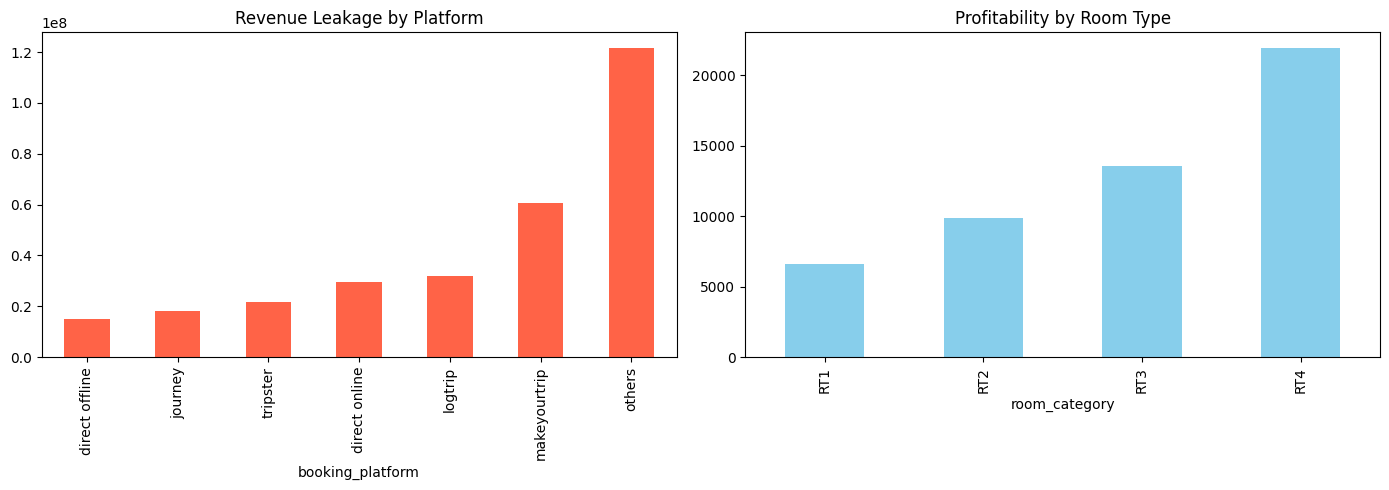

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Revenue loss by platform
platform_leakage = bookings.groupby('booking_platform')['revenue_loss'].sum().sort_values()
platform_leakage.plot(kind='bar', ax=axs[0], color='tomato')
axs[0].set_title("Revenue Leakage by Platform")

# Average net profit by room type
room_profit = bookings.groupby('room_category')['net_profit'].mean().sort_values()
room_profit.plot(kind='bar', ax=axs[1], color='skyblue')
axs[1].set_title("Profitability by Room Type")

plt.tight_layout()
plt.show()

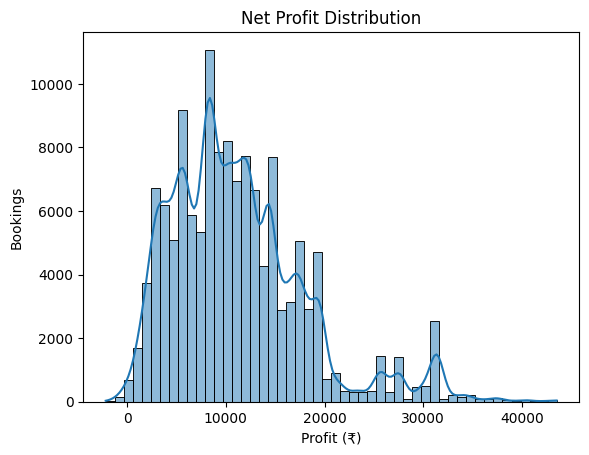

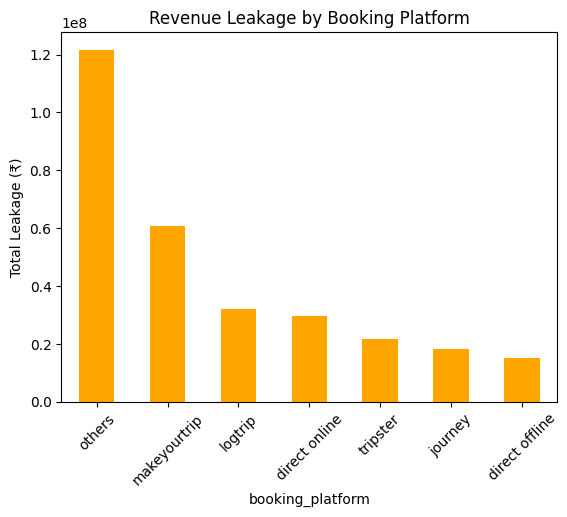

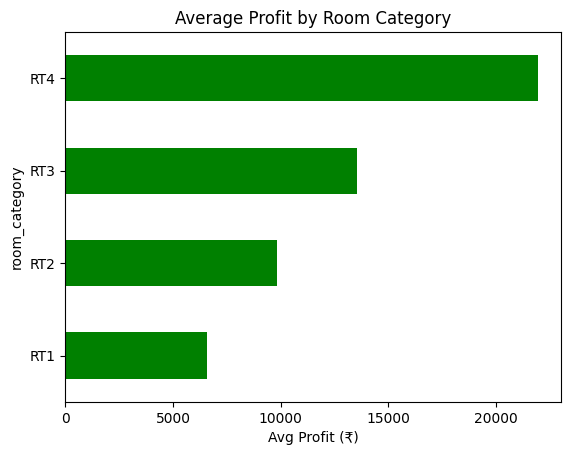

In [9]:
sns.histplot(bookings['net_profit'], bins=50, kde=True)
plt.title("Net Profit Distribution")
plt.xlabel("Profit (₹)")
plt.ylabel("Bookings")
plt.show()

platform_leakage = bookings.groupby('booking_platform')['revenue_loss'].sum().sort_values(ascending=False)
platform_leakage.plot(kind='bar', color='orange')
plt.title("Revenue Leakage by Booking Platform")
plt.ylabel("Total Leakage (₹)")
plt.xticks(rotation=45)
plt.show()

room_profit = bookings.groupby('room_category')['net_profit'].mean().sort_values()
room_profit.plot(kind='barh', color='green')
plt.title("Average Profit by Room Category")
plt.xlabel("Avg Profit (₹)")
plt.show()

In [11]:
print(" Total Bookings:", len(bookings))
print(" Completed:", len(completed))
print(" Canceled:", len(cancelled))
print(" Revenue Leakage: ₹", total_leakage)
print(" Average Net Profit per Booking: ₹", bookings['net_profit'].mean())
print(" % Profitable Bookings:", bookings['is_profitable'].mean() * 100)

 Total Bookings: 134590
 Completed: 0
 Canceled: 0
 Revenue Leakage: ₹ 298774986
 Average Net Profit per Booking: ₹ 11201.193469054164
 % Profitable Bookings: 99.66267924808679
